In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [100]:
df = pd.read_csv("cleaned_pgatour_data.csv")
df.columns

Index(['year', 'player', 'rounds', 'country', 'sg_total',
       'birdie_or_better_percentage', 'bogey_avoidance',
       'par_3_scoring_average', 'par_4_scoring_average',
       'par_5_scoring_average', 'sg_off_the_tee', 'driving_distance',
       'driving_accuracy_percentage', 'going_for_the_green',
       'going_for_the_green___hit_green_pct.', 'gir_percentage___200+_yards',
       'gir_percentage___175_200_yards', 'approaches_from_>_275_yards',
       'approaches_from_250_275_yards', 'approaches_from_225_250_yards',
       'approaches_from_200_225_yards', 'approaches_from_175_200_yards',
       'gir_percentage___150_175_yards', 'gir_percentage___125_150_yards',
       'gir_percentage___100_125_yards', 'approaches_from_150_175_yards',
       'approaches_from_125_150_yards', 'approaches_from_100_125_yards',
       'fairway_proximity', 'rough_proximity', 'sg_approach_the_green',
       'gir_percentage___<_100_yards', 'approaches_from_inside_100_yards',
       'sg_around_the_green', 's

In [101]:
dropped_cols = ['rounds', 'country']
df = df.drop(columns=dropped_cols)

In [102]:
df.to_csv("prePCA.csv", index=False)

In [103]:
pca_df = df.copy()

In [104]:
pca_df.dropna(inplace=True)

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/1688438568.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_sorted.values, y=loadings_sorted.index, palette='coolwarm')


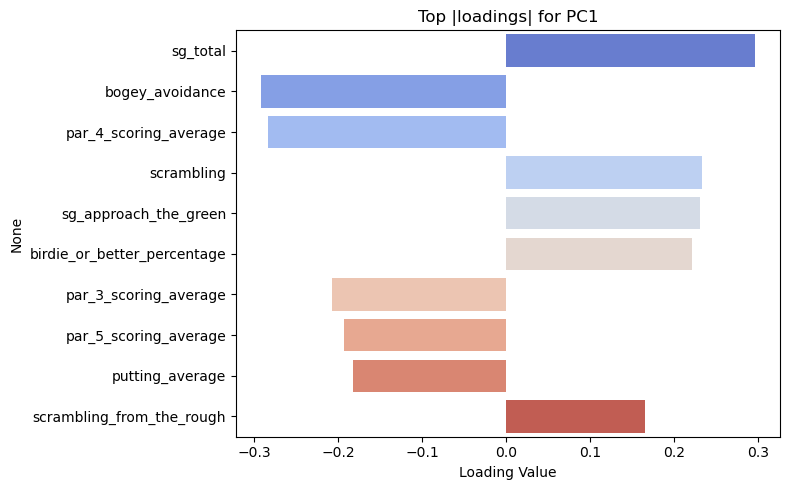

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/1688438568.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loadings_sorted.values, y=loadings_sorted.index, palette='coolwarm')


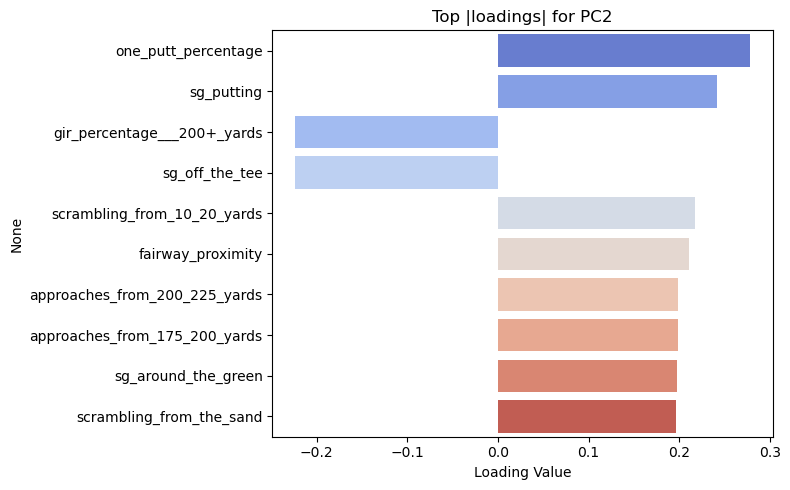

Number of components for 85% variance: 24
Explained variance: [0.18313494 0.1253071  0.08429608 0.04582084 0.04386253 0.03046793
 0.02733277 0.02555163 0.02307286 0.02141474 0.02088022 0.02035873
 0.01965069 0.01925261 0.01866203 0.01818084 0.01793264 0.01753741
 0.01680865 0.0166452  0.01584887 0.01567153 0.01505004 0.01384685]


In [105]:
passthrough_cols = ['player', 'year']
X = pca_df.drop(columns=passthrough_cols)
feature_names = X.columns.tolist()

scaler = StandardScaler()
Xz = scaler.fit_transform(X)

pca = PCA(n_components=0.85)
PCs = pca.fit_transform(Xz)

loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f'PC{i+1}' for i in range(pca.n_components_)],
    index=feature_names
)

pcs_to_plot = ['PC1', 'PC2']

for pc in pcs_to_plot:
    loadings_sorted = loadings[pc].sort_values(key=abs, ascending=False).head(10)
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=loadings_sorted.values, y=loadings_sorted.index, palette='coolwarm')
    plt.title(f'Top |loadings| for {pc}')
    plt.xlabel('Loading Value')
    plt.tight_layout()
    plt.show()
    
print("Number of components for 85% variance:", pca.n_components_)
print("Explained variance:", pca.explained_variance_ratio_)

In [106]:
pc_cols = [f"PC{i+1}" for i in range(pca.n_components_)]
pc_df = pd.DataFrame(PCs, columns=pc_cols, index=pca_df.index)

In [107]:
baseline_pca_df = pd.concat([pca_df[passthrough_cols], pc_df], axis=1)

In [108]:
baseline_pca_df.head()

,player,year,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,...,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
0,Aaron Baddeley,2015,-0.128894,4.660794,2.671374,-0.635562,-0.675950,0.660069,3.557790,0.221204,...,0.006575,0.422897,0.643015,0.423067,1.155112,0.199846,0.379469,0.351770,0.397928,-1.493116
1,Adam Hadwin,2015,-0.523382,-0.022318,-0.759599,0.211684,1.798283,1.239510,1.248271,0.702175,...,0.744462,0.112093,0.097194,0.393602,0.060549,-1.196197,0.204282,-0.344083,0.616732,-0.261839
2,Adam Scott,2015,-2.283188,-3.739536,-0.105432,0.555465,-1.047240,-2.652068,0.674096,3.844732,...,3.881984,0.466796,0.181989,1.257076,-0.130206,-0.380080,2.195630,-1.161075,2.464329,1.386063
3,Alex Cejka,2015,0.060155,-0.003537,-3.180603,-0.565528,-0.864184,0.798099,-0.413609,-0.923092,...,0.320052,-1.077615,0.345414,0.652439,0.786601,0.446008,-0.102260,-0.669157,1.462042,0.486018
4,Alex Prugh,2015,-1.449433,-3.837650,-1.054605,1.370875,1.949112,-1.695378,0.964402,-1.782919,...,0.470228,0.122408,-0.228759,0.380127,0.808019,-0.121847,0.129601,-1.650631,0.253304,0.162431


In [109]:
baseline_pca_df.to_csv("pca_baseline_85pct.csv", index=False)

In [110]:
ott_distance = [
    # 'sg_off_the_tee',
    'driving_distance',
    'going_for_the_green',
]

ott_accuracy = [
    'driving_accuracy_percentage'
]

In [111]:
long_irons = [
    'gir_percentage___200+_yards',
    'gir_percentage___175_200_yards',
    'approaches_from_>_275_yards',
    'approaches_from_250_275_yards',
    'approaches_from_225_250_yards',
    'approaches_from_200_225_yards',
    'approaches_from_175_200_yards',
    'fairway_proximity', # flagged
    'rough_proximity'
]

In [112]:
short_irons = [
    'gir_percentage___150_175_yards',
    'gir_percentage___125_150_yards',
    'gir_percentage___100_125_yards',
    'gir_percentage___<_100_yards',
    'approaches_from_150_175_yards',
    'approaches_from_125_150_yards',
    'approaches_from_100_125_yards',
    'approaches_from_inside_100_yards'
]


In [113]:
around_green = [
    # 'sg_around_the_green',
    'scrambling',
    'proximity_to_hole_(arg)',
    'sand_save_percentage',
    'scrambling_from_the_rough',
    'scrambling_from_the_sand',
    'scrambling_from_<_10_yards',
    'scrambling_from_10_20_yards',
    'scrambling_from_20_30_yards',
    'scrambling_from_>_30_yards'
]

In [114]:
putting = [
    # 'sg_putting',
    'putting_average',
    'one_putt_percentage',
    '3_putt_avoidance___inside_5\'',
    '3_putt_avoidance___5_10\'',
    '3_putt_avoidance___10_15\'',
    '3_putt_avoidance___15_20\'',
    '3_putt_avoidance___20_25\'',
    '3_putt_avoidance_>_25\'',
    'average_distance_of_putts_made'
]

In [115]:
par5_aggressiveness = [
    'par_5_scoring_average',
    'going_for_the_green',
    'going_for_the_green___hit_green_pct.'
]

In [116]:
scoring_cols = [
    # 'sg_total', 
    'birdie_or_better_percentage', 'bogey_avoidance',
    'par_3_scoring_average', 'par_4_scoring_average'
]

In [117]:
pca_df.head()

,year,player,sg_total,birdie_or_better_percentage,bogey_avoidance,par_3_scoring_average,par_4_scoring_average,par_5_scoring_average,sg_off_the_tee,driving_distance,...,sg_putting,putting_average,one_putt_percentage,3_putt_avoidance___inside_5',3_putt_avoidance___5_10',3_putt_avoidance___10_15',3_putt_avoidance___15_20',3_putt_avoidance___20_25',3_putt_avoidance_>_25',average_distance_of_putts_made
0,2015,Aaron Baddeley,-0.223,0.2065,0.1637,2.99,4.10,4.57,-0.596,294.1,...,0.722,1.744,0.4272,0.0076,0.0046,0.0113,0.0141,0.0114,0.0662,79.416667
1,2015,Adam Hadwin,0.183,0.2013,0.1571,3.05,4.04,4.68,0.088,288.2,...,0.235,1.772,0.3793,0.0069,0.0039,0.0045,0.0058,0.0214,0.0886,78.166667
2,2015,Adam Scott,0.206,0.2153,0.1725,3.14,4.04,4.58,0.682,311.6,...,-0.396,1.806,0.3588,0.0236,0.0000,0.0247,0.0000,0.0408,0.1623,74.166667
3,2015,Alex Cejka,-0.217,0.2017,0.1552,3.04,4.03,4.67,-0.233,283.3,...,-0.232,1.765,0.3931,0.0000,0.0000,0.0090,0.0063,0.0238,0.1107,69.500000
4,2015,Alex Prugh,-0.004,0.2035,0.1604,3.03,4.06,4.61,0.319,295.2,...,-0.055,1.792,0.3389,0.0046,0.0000,0.0000,0.0071,0.0078,0.0904,66.083333


In [118]:
pca_df.drop(columns=[col for col in pca_df.columns if col.startswith("sg_")], inplace=True)

In [119]:
def pca_reduce_with_prefix(df, cols, prefix, n_components=2):
    pc_df, pca_obj, pc_cols, var_exp = pca_reduce(df, cols, n_components)

    # rename columns to prefix_PC1, prefix_PC2
    pc_df = pc_df.rename(columns={c: f"{prefix}_{c}" for c in pc_cols})

    return pc_df, pca_obj, pc_cols, var_exp

def pca_reduce(df, cols, n_components=2):
    X = df[cols].dropna()
    scaler = StandardScaler()
    Xz = scaler.fit_transform(X)

    pca = PCA(n_components=min(n_components, len(cols)))
    pcs = pca.fit_transform(Xz)

    pc_cols = [f"PC{i+1}" for i in range(pca.n_components_)]
    pc_df = pd.DataFrame(np.nan, index=df.index, columns=pc_cols)
    pc_df.loc[X.index] = pcs

    var_exp = pca.explained_variance_ratio_

    return pc_df, pca, pc_cols, var_exp

In [120]:
def plot_loadings(pca, feature_names, pc_cols, n=10, title_prefix=""):
    loadings = pd.DataFrame(
        pca.components_.T,
        index=feature_names,
        columns=pc_cols
    )

    for pc in pc_cols:
        load_sorted = loadings[pc].sort_values(key=np.abs, ascending=False).head(n)

        plt.figure(figsize=(8,5))
        sns.barplot(
            x=load_sorted.values,
            y=load_sorted.index,
            palette="coolwarm",
            orient="h"
        )
        plt.title(f"{title_prefix}: Top |loadings| for {pc}")
        plt.xlabel("Loading Value")
        plt.tight_layout()
        plt.show()

In [121]:
ott_pcs, pca_ott, ott_pc_cols, ott_var = pca_reduce_with_prefix(pca_df, ott_distance, "ott")
long_pcs, pca_long, long_pc_cols, long_var = pca_reduce_with_prefix(pca_df, long_irons, "long")
short_pcs, pca_short, short_pc_cols, short_var = pca_reduce_with_prefix(pca_df, short_irons, "short")
arg_pcs, pca_arg, arg_pc_cols, arg_var = pca_reduce_with_prefix(pca_df, around_green, "arg")
putt_pcs, pca_putt, putt_pc_cols, putt_var = pca_reduce_with_prefix(pca_df, putting, "putt")
par5_pcs, pca_par5, par5_pc_cols, par5_var = pca_reduce_with_prefix(pca_df, par5_aggressiveness, "par5")
score_pcs, pca_score, score_pc_cols, score_var = pca_reduce_with_prefix(pca_df, scoring_cols, "score")

In [122]:
all_pcs_df = pd.concat([
    pca_df[['player', 'year']],  # passthrough identifying columns
    ott_pcs,
    long_pcs,
    short_pcs,
    arg_pcs,
    putt_pcs,
], axis=1)

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


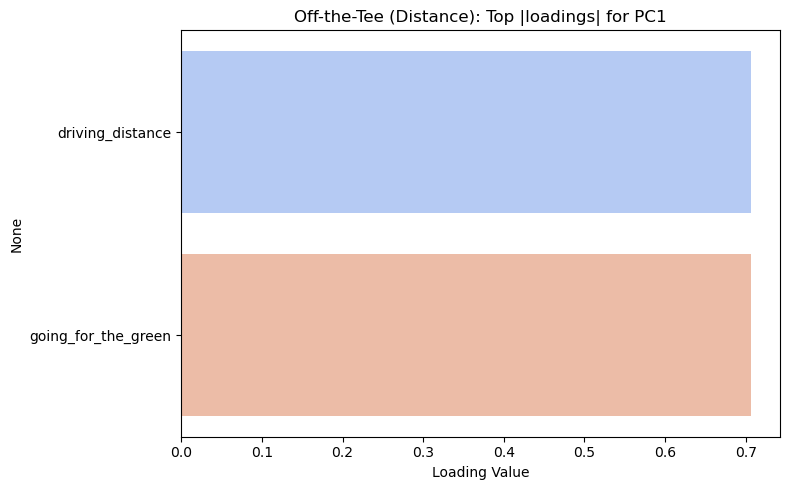

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


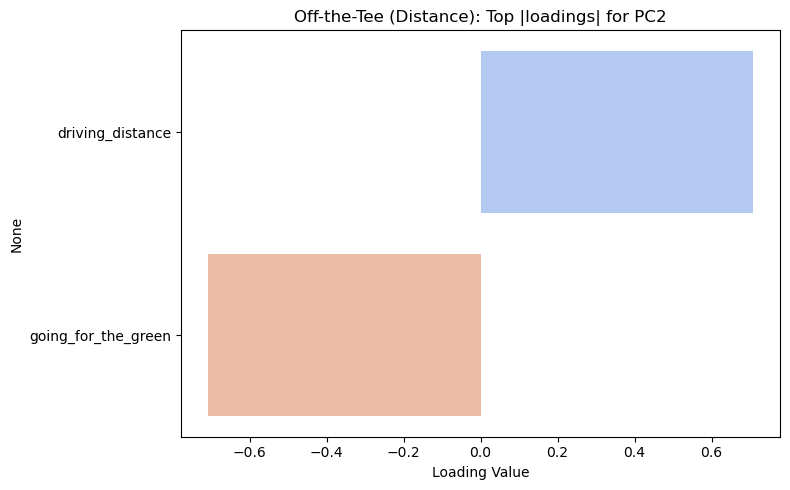

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


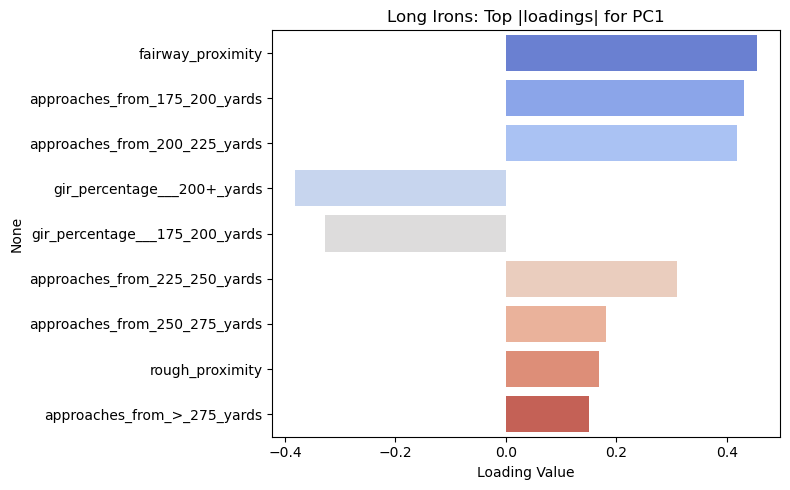

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


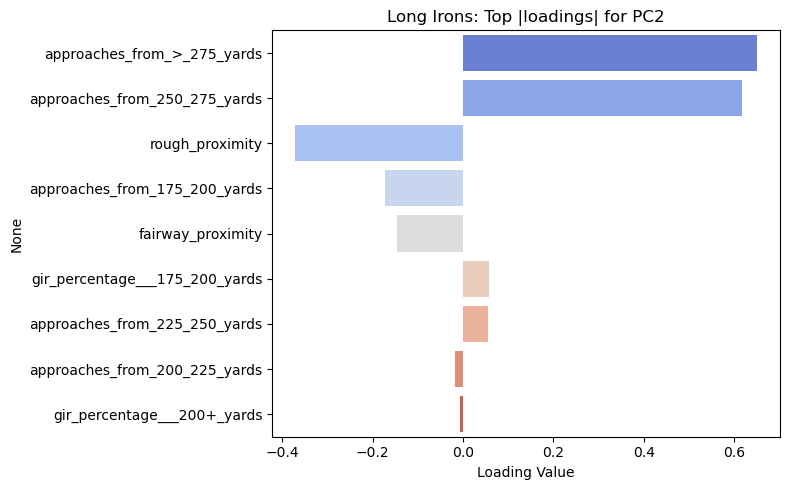

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


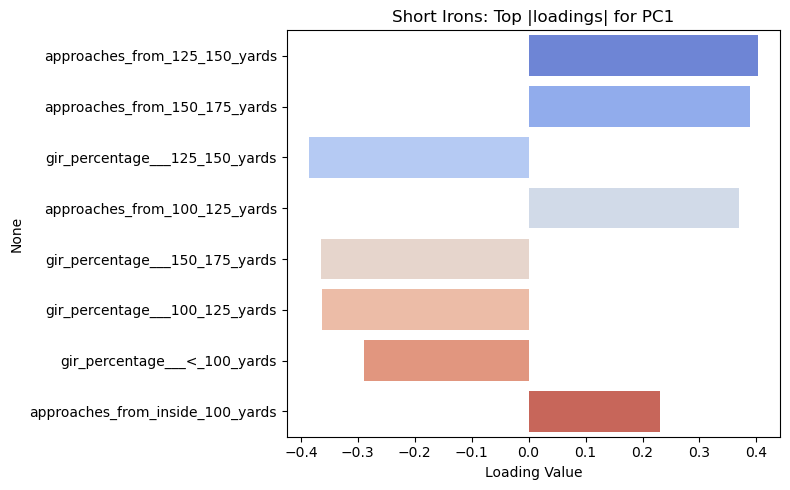

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


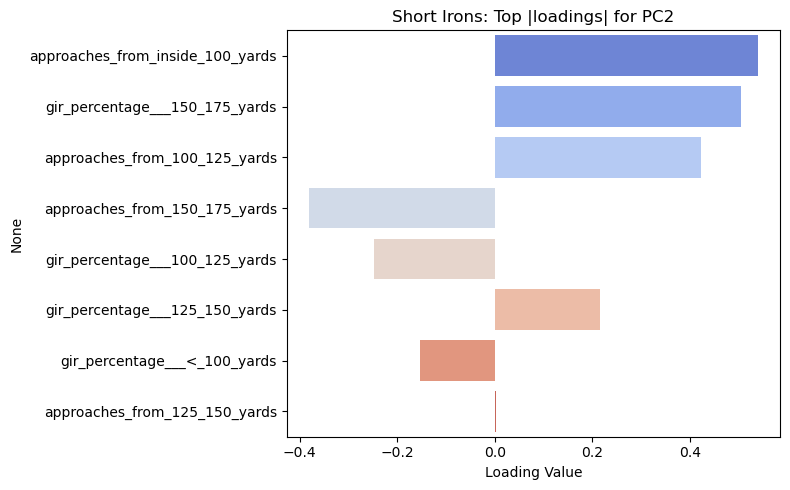

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


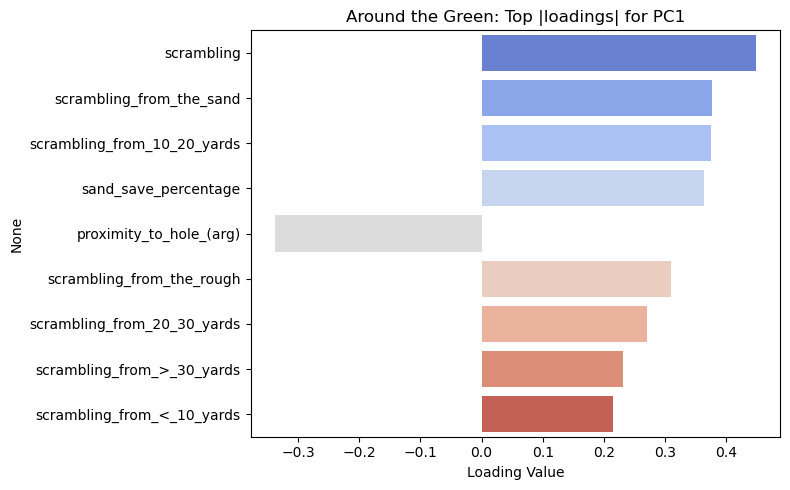

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


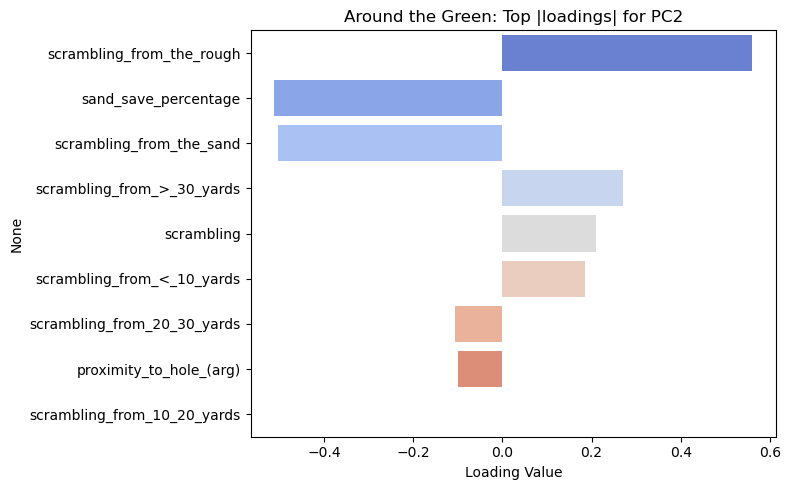

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


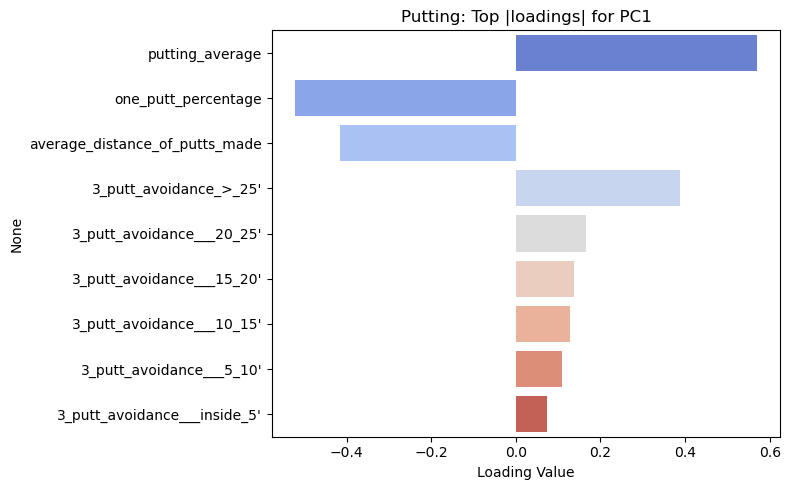

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


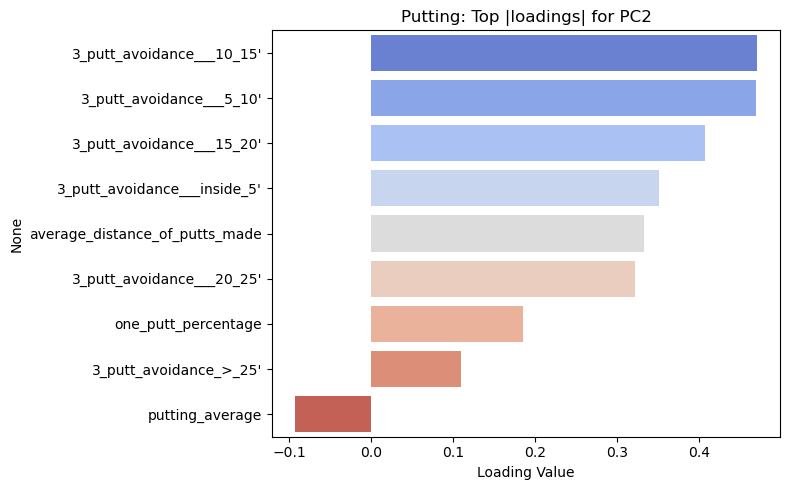

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


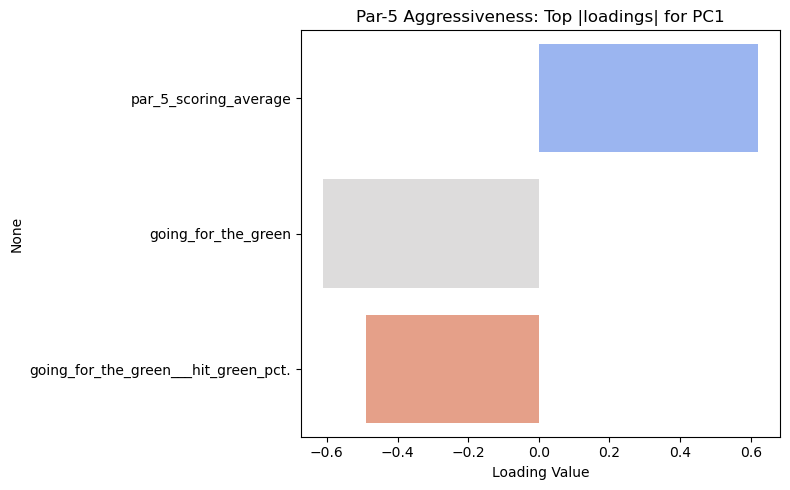

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


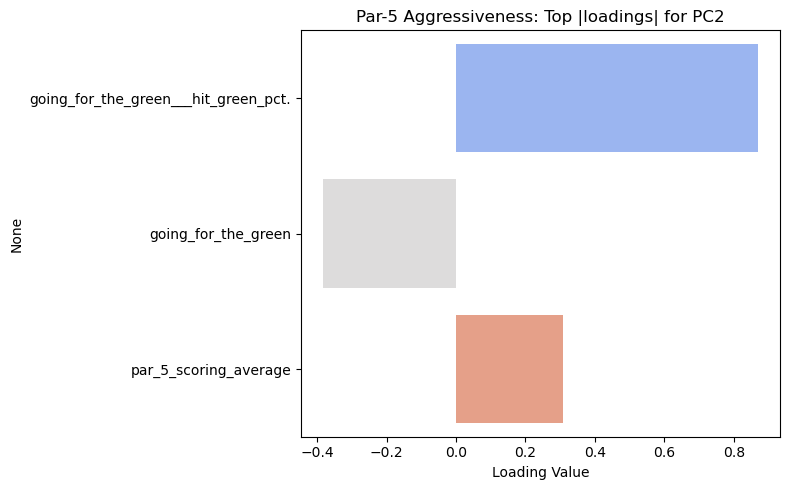

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


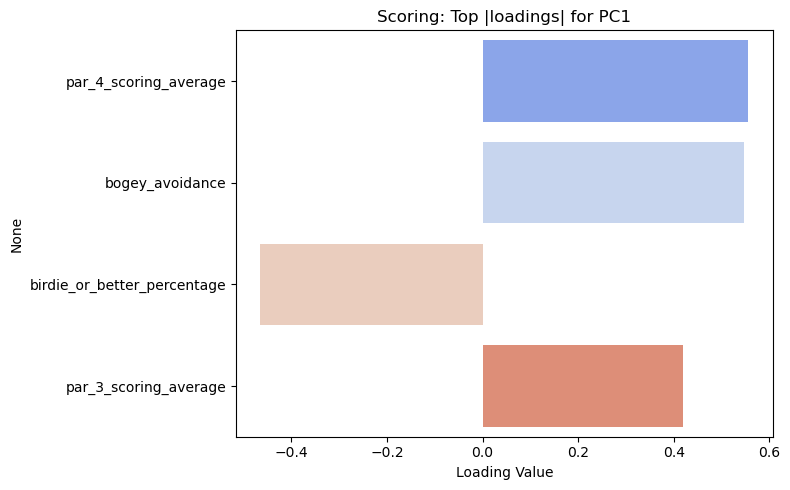

/var/folders/94/k_n9_k290dq3fhrtlyvj38qh0000gn/T/ipykernel_4984/2178947090.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


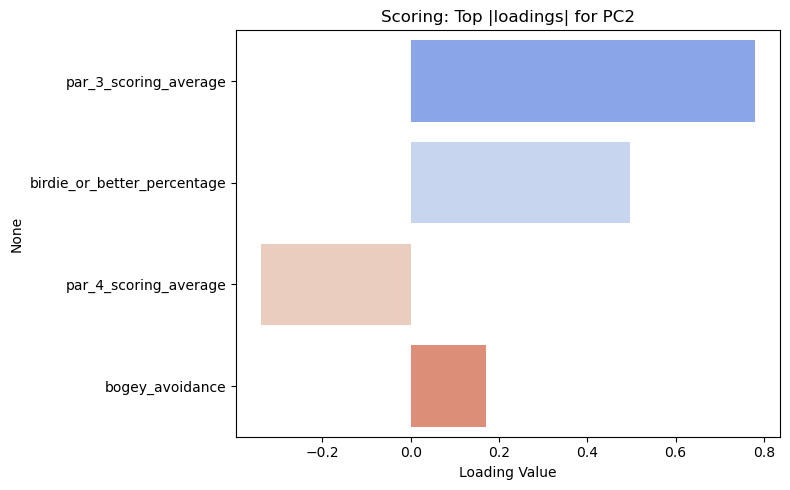

In [123]:
plot_loadings(pca_ott, ott_distance, ott_pc_cols, title_prefix="Off-the-Tee (Distance)")
plot_loadings(pca_long, long_irons, long_pc_cols, title_prefix="Long Irons")
plot_loadings(pca_short, short_irons, short_pc_cols, title_prefix="Short Irons")
plot_loadings(pca_arg, around_green, arg_pc_cols, title_prefix="Around the Green")
plot_loadings(pca_putt, putting, putt_pc_cols, title_prefix="Putting")
plot_loadings(pca_par5, par5_aggressiveness, par5_pc_cols, title_prefix="Par-5 Aggressiveness")
plot_loadings(pca_score, scoring_cols, score_pc_cols, title_prefix="Scoring")

In [124]:
def plot_variance_hist(var_exp, title):
    pc_names = [f"PC{i+1}" for i in range(len(var_exp))]
    cumulative = var_exp.cumsum()

    plt.figure(figsize=(6,4))
    sns.barplot(x=pc_names, y=var_exp)
    
    for i, v in enumerate(var_exp):
        plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

    plt.title(f"{title}: Variance Explained by PC1 & PC2")
    plt.ylabel("Proportion of Variance")
    plt.ylim(0, 1)
    plt.show()

    print(f"{title} — PC1: {var_exp[0]:.2f}, PC2: {var_exp[1] if len(var_exp)>1 else 0:.2f}, Total: {cumulative[-1]:.2f}")


In [125]:
categories = [
    "OTT Distance",
    "Long Irons",
    "Short Irons",
    "Around Green",
    "Putting",
]

totals = [
    sum(ott_var),
    sum(long_var),
    sum(short_var),
    sum(arg_var),
    sum(putt_var),
]

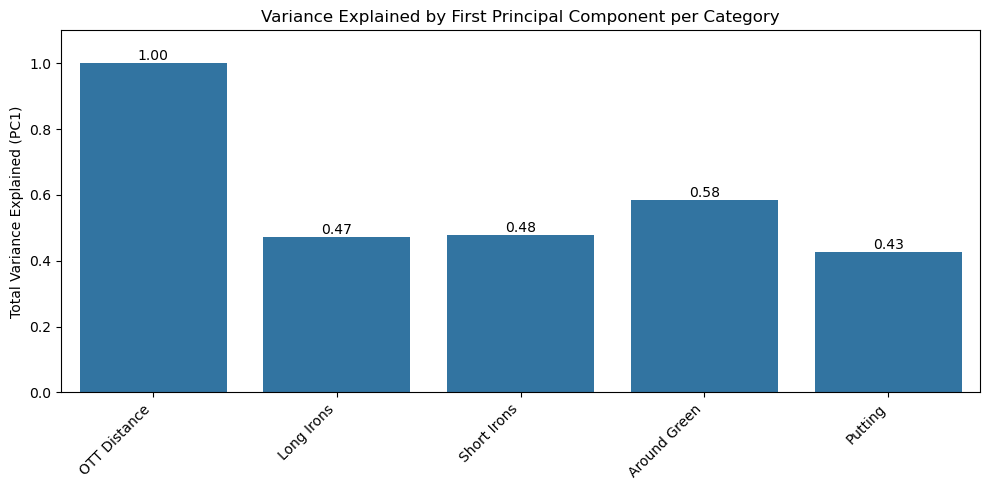

In [126]:
plt.figure(figsize=(10,5))
sns.barplot(x=categories, y=totals)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Total Variance Explained (PC1)")
plt.title("Variance Explained by First Principal Component per Category")

# Label bars with values
for i, v in enumerate(totals):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center')

plt.ylim(0, max(totals) + 0.1)
plt.tight_layout()
plt.show()


In [127]:
all_pcs_df.shape

(2058, 12)

In [128]:
all_pcs_df.to_csv("pca_reduced_data.csv", index=False)

In [129]:
all_pcs_df.head()

,player,year,ott_PC1,ott_PC2,long_PC1,long_PC2,short_PC1,short_PC2,arg_PC1,arg_PC2,putt_PC1,putt_PC2
0,Aaron Baddeley,2015,-0.346121,-0.058158,1.365358,-1.554837,1.944796,0.438472,2.390670,-0.657102,-2.230916,1.643255
1,Adam Hadwin,2015,-1.034984,-0.250355,-0.697110,0.864984,0.682807,0.556150,-0.547433,-0.338452,-0.121050,0.487975
2,Adam Scott,2015,1.469585,0.739453,0.719802,1.610406,-0.493721,-0.291971,-2.017656,0.368628,3.579155,3.401712
3,Alex Cejka,2015,-2.040981,0.023913,-0.323083,1.489601,-1.084762,1.050192,0.075240,-0.054348,0.509513,-0.925710
4,Alex Prugh,2015,-0.445322,0.205309,-0.776559,0.166325,-1.524262,-0.954357,-3.401543,0.437841,2.228722,-2.087727


In [130]:
pc1_cols = ["ott_PC1", "long_PC1", "short_PC1", "arg_PC1",
            "putt_PC1"]

def rowwise_zscore(df, cols):
    row_mean = df[cols].mean(axis=1)
    row_std = df[cols].std(axis=1)
    return df[cols].subtract(row_mean, axis=0).div(row_std, axis=0)

phenotypes = rowwise_zscore(all_pcs_df, pc1_cols)

cluster_df = pd.concat([all_pcs_df[['player', 'year']], phenotypes], axis=1)

cluster_df.to_csv("phenotype_matrix.csv", index=False)

cluster_df.head()

,player,year,ott_PC1,long_PC1,short_PC1,arg_PC1,putt_PC1
0,Aaron Baddeley,2015,-0.509809,0.388889,0.693153,0.927282,-1.499516
1,Adam Hadwin,2015,-1.046071,-0.534898,1.552791,-0.308450,0.336628
2,Adam Scott,2015,0.389144,0.032519,-0.544679,-1.269520,1.392535
3,Alex Cejka,2015,-1.455240,0.247533,-0.507440,0.642349,1.072798
4,Alex Prugh,2015,0.166195,0.003552,-0.363583,-1.285360,1.479197
